
# Name: UGESH KC
#Stroke Prediction via Classification Analysis
# Description:
This script implements a classification analysis for stroke prediction using a publicly available dataset. The analysis is aligned with a United Nations Sustainable Development Goal (e.g., Good Health and Well-Being). The script includes comprehensive exploratory data analysis (EDA), preprocessing,implementation of logistic regression from scratch, training of primary models,hyperparameter tuning with cross-validation, feature selection, and final model evaluation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif

#  Dataset Loading and Overview

In [ ]:
# Load the dataset into a Pandas DataFrame
file_path = "/content/drive/MyDrive/Final_Protofolio/brain_stroke.csv"
df = pd.read_csv(file_path)

In [ ]:
# Data Cleaning: Check for missing values and duplicates
print("Missing values per column:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df_clean = df.drop_duplicates()
print("Dataset shape after cleaning:", df_clean.shape)

Missing values per column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Number of duplicate rows: 0
Dataset shape after cleaning: (4981, 11)


Interpretation:
- The dataset shows no missing values and duplicate rows.
- This confirms that the data is clean and is ready for further analysis.

#  Exploratory Data Analysis (EDA)

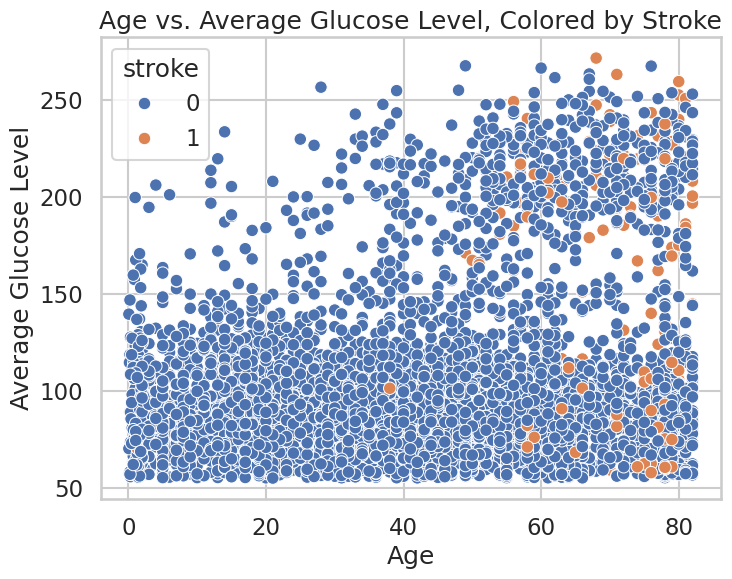

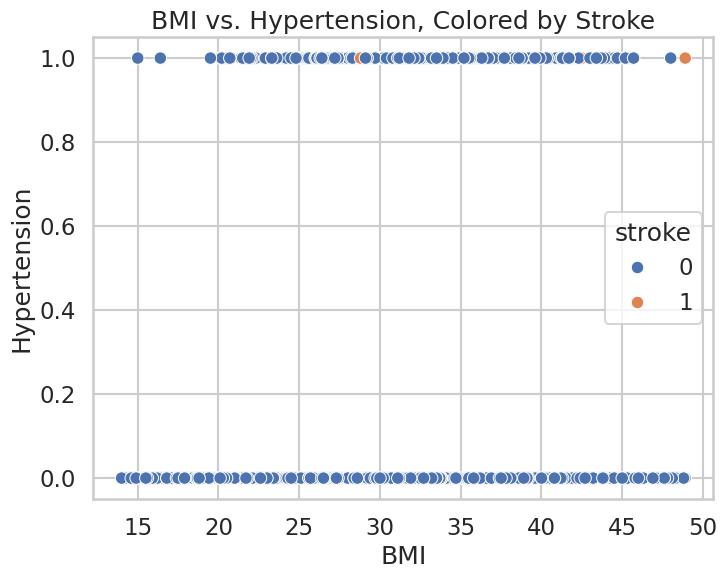

In [ ]:

import matplotlib.pyplot as plt


# Scatter plot of 'age' vs. 'avg_glucose_level'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df_clean)
plt.title('Age vs. Average Glucose Level, Colored by Stroke')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='hypertension', hue='stroke', data=df_clean)
plt.title('BMI vs. Hypertension, Colored by Stroke')
plt.xlabel('BMI')
plt.ylabel('Hypertension')
plt.show()


The first scatter plot (Age vs. Glucose Level) explores stroke risk based on age and glucose levels, revealing potential trends or clusters. The second plot (BMI vs. Hypertension) examines their relationship with stroke occurrence. Overlapping points suggest these factors alone may not be strong predictors.

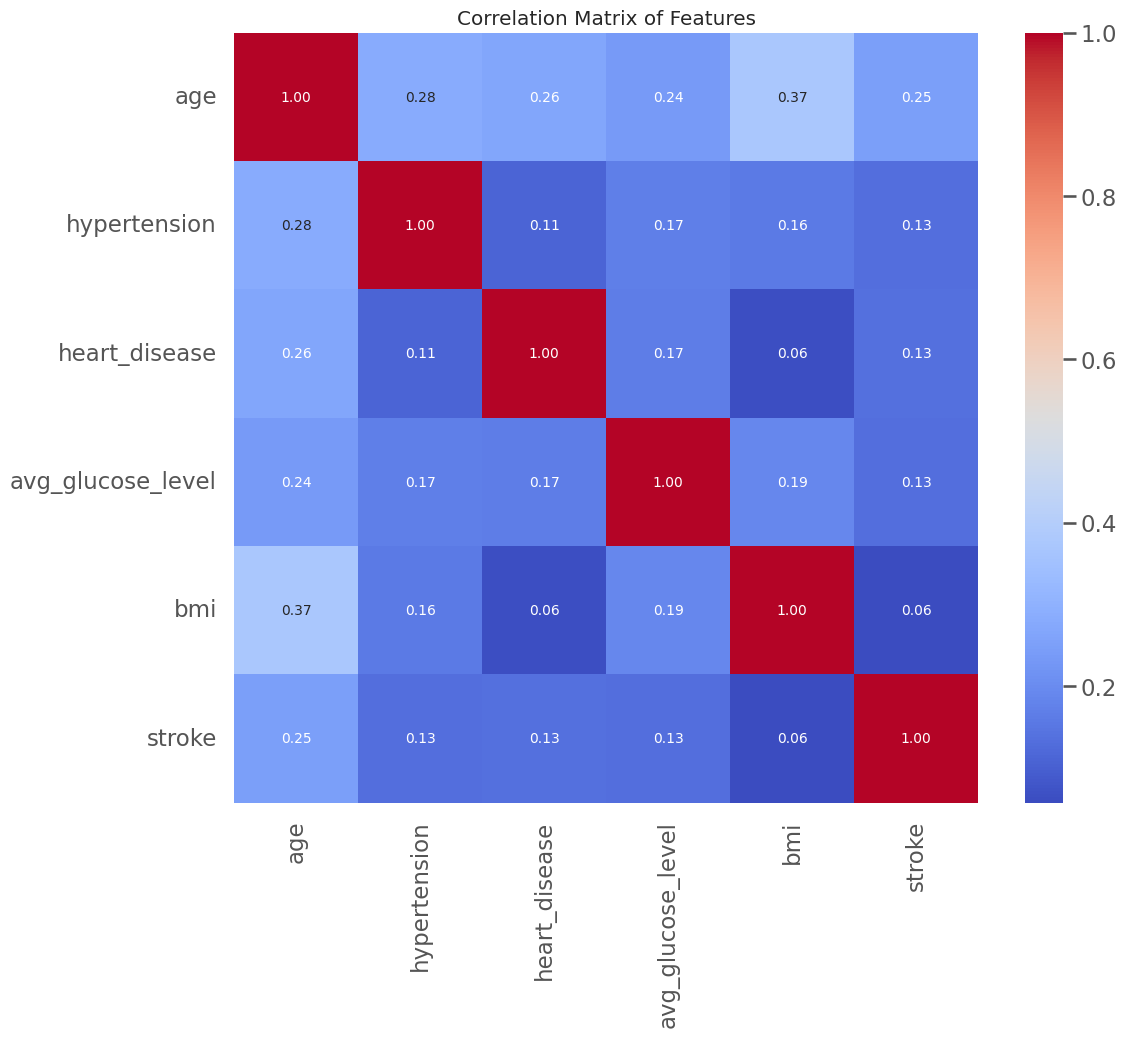

In [ ]:

import matplotlib.pyplot as plt
numerical_features = df_clean.select_dtypes(include=np.number).columns
df_numeric = df_clean[numerical_features]

# Correlation Matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


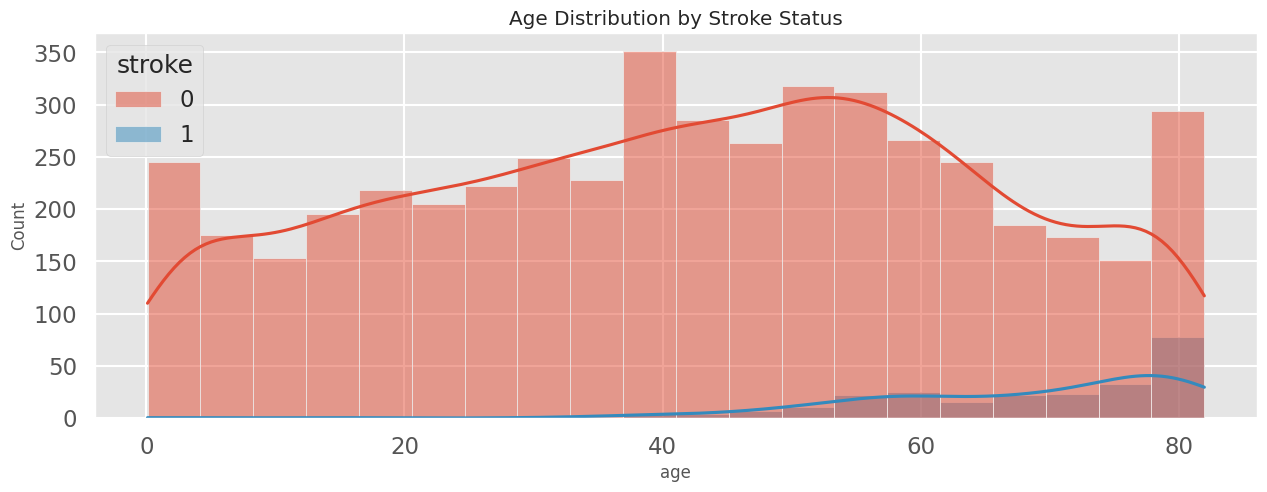

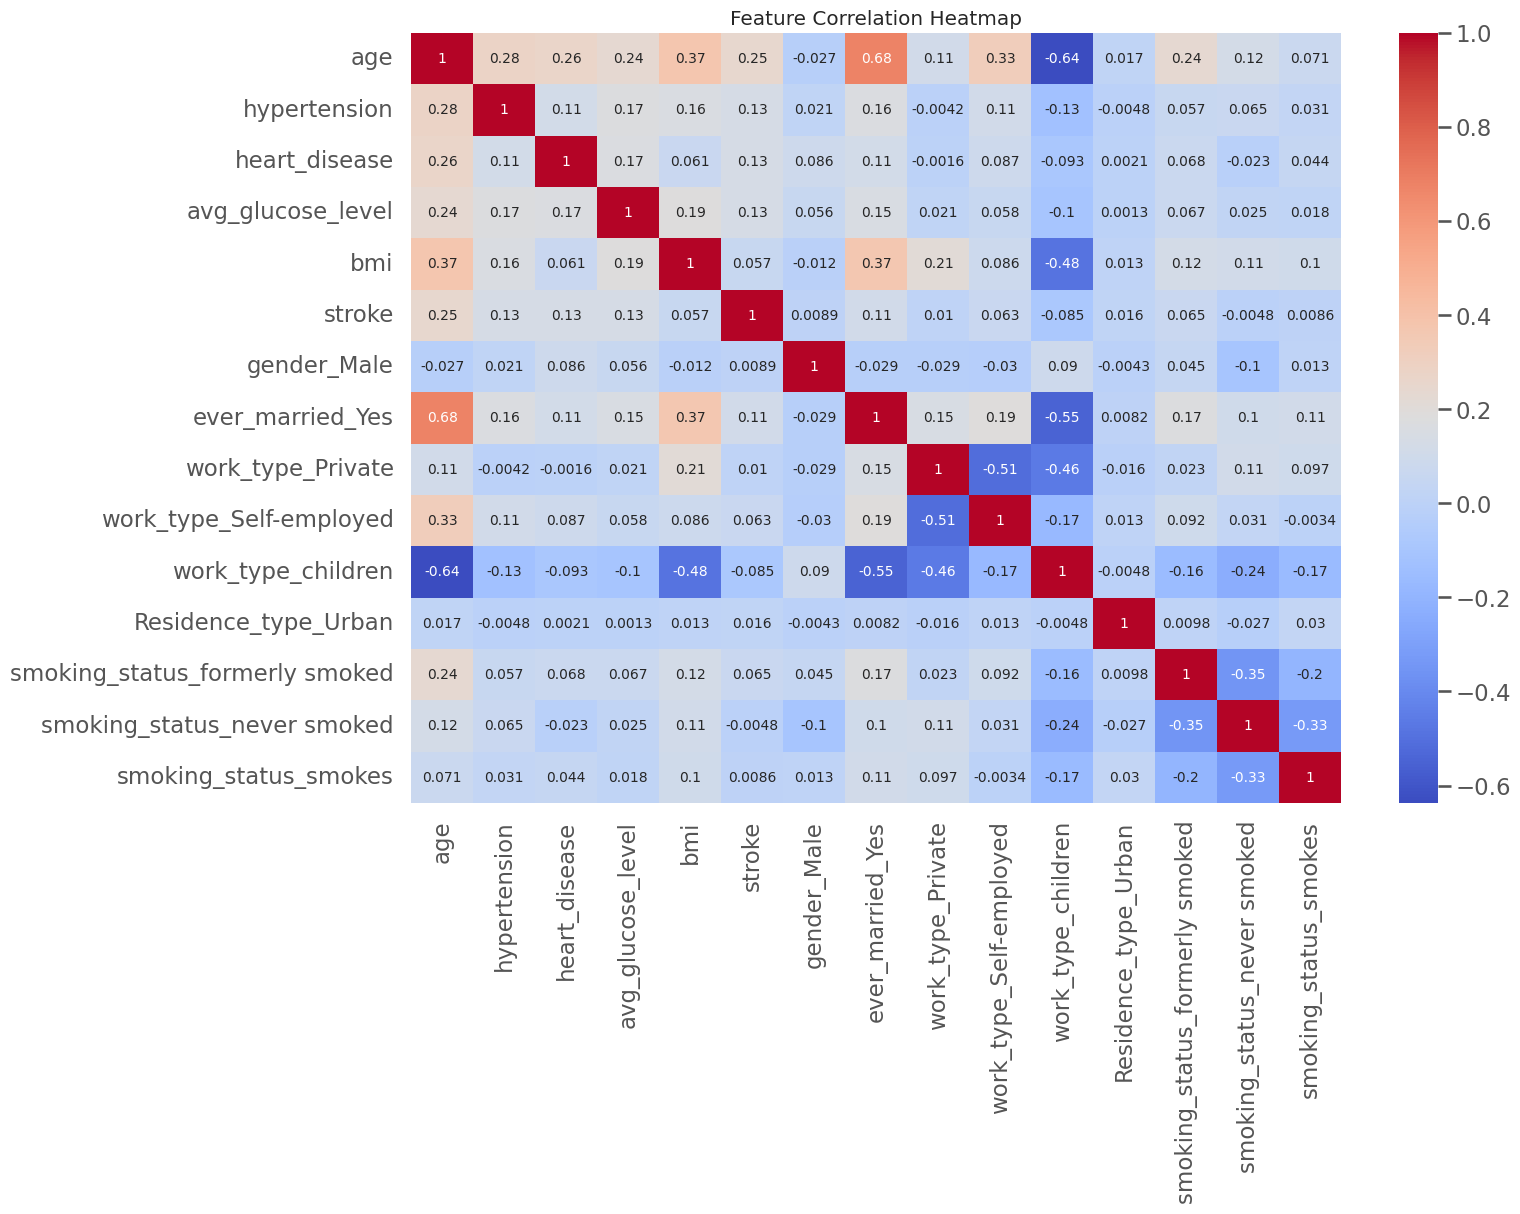

In [ ]:
#  Conducting Exploratory Data Analysis (EDA)
# Handle missing BMI values
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())


# Encode categorical features
cat_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Visualizations
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='age', hue='stroke', kde=True)
plt.title("Age Distribution by Stroke Status")
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

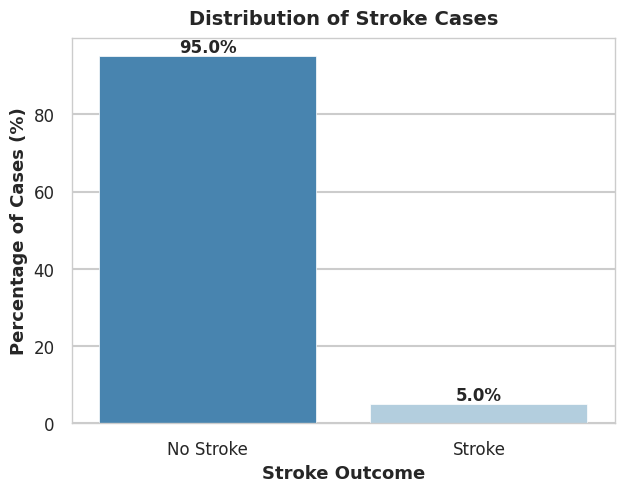

In [ ]:
# Distribution of the Target Variable (Stroke Outcome)
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
stroke_counts = df_clean["stroke"].value_counts(normalize=True) * 100
ax = sns.barplot(
    x=stroke_counts.index,
    y=stroke_counts.values,
    hue=stroke_counts.index,
    palette="Blues_r",
    legend=False
)
plt.xticks([0, 1], ["No Stroke", "Stroke"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Stroke Outcome", fontsize=13, fontweight="bold")
plt.ylabel("Percentage of Cases (%)", fontsize=13, fontweight="bold")
plt.title("Distribution of Stroke Cases", fontsize=14, fontweight="bold", pad=10)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")
plt.show()


Detailed Analysis of bar chart:
- The bar chart reveals a strong class imbalance.
- Approximately 5% of the observations indicate a stroke, whereas 95% are non-stroke.
- This imbalance is common in medical datasets and must be considered in modeling.


 Detailed Analysis of histogram:
- The histogram with a kernel density estimate (KDE) shows that stroke cases are concentrated in older age groups(which means left skewed).
- A notable increase in stroke frequency is observed for individuals above 50 years.
- This suggests that age is a critical risk factor and should be a key feature in predictive models.

Detailed Analysis of Heatmap
- The heatmap reveals that age has a moderate positive correlation with stroke (0.25), highlighting that older individuals are at a higher risk.
- Features like hypertension and heart_disease also show weak positive correlations (0.13 each) with stroke, suggesting they contribute to stroke prediction but are not dominant factors.
- A strong negative correlation is observed between work_type_children and age (-0.64), indicating that younger individuals are categorized as "children."
The correlation between age and ever_married_Yes (0.68) reflects demographic trends where older individuals are more likely to be married.
- Weak or near-zero correlations for features like gender_Male and Residence_type_Urban suggest they may not be significant predictors for stroke.

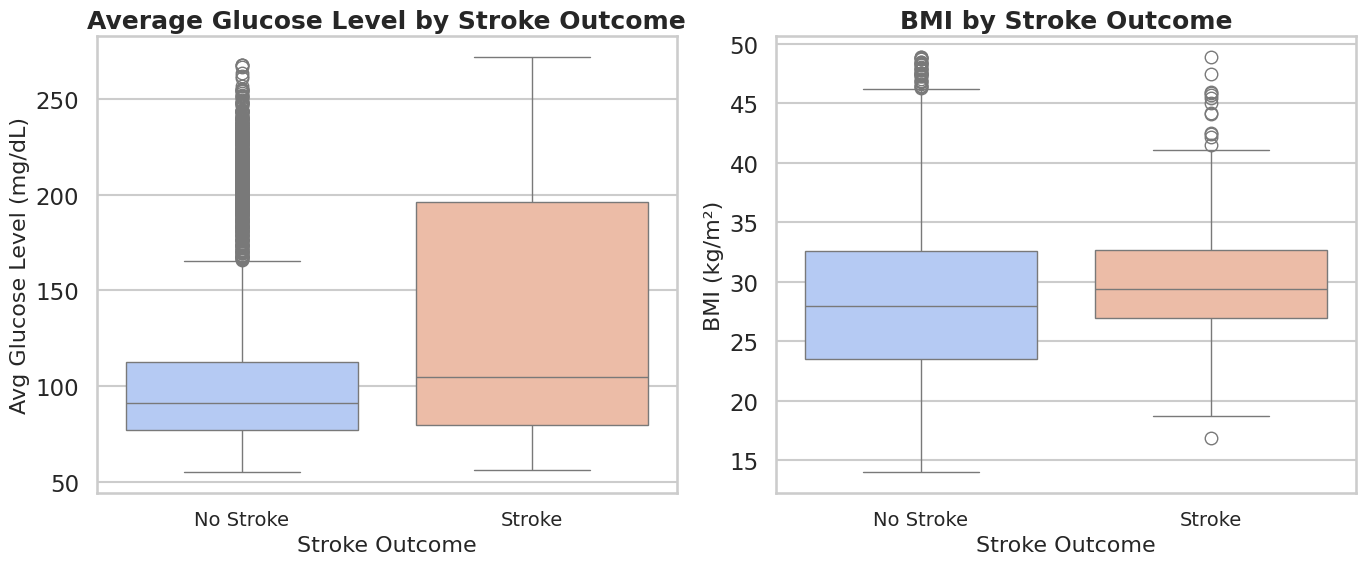

In [ ]:
#  Boxplots for Average Glucose Level and BMI by Stroke Outcome
sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level", hue="stroke",
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Average Glucose Level by Stroke Outcome", fontsize=18, fontweight="bold")
axes[0].set_xlabel("Stroke Outcome", fontsize=16)
axes[0].set_ylabel("Avg Glucose Level (mg/dL)", fontsize=16)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Stroke", "Stroke"], fontsize=14)
if axes[0].get_legend() is not None:
    axes[0].get_legend().remove()

sns.boxplot(data=df_clean, x="stroke", y="bmi", hue="stroke",
            palette="coolwarm", ax=axes[1])
axes[1].set_title("BMI by Stroke Outcome", fontsize=18, fontweight="bold")
axes[1].set_xlabel("Stroke Outcome", fontsize=16)
axes[1].set_ylabel("BMI (kg/m²)", fontsize=16)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No Stroke", "Stroke"], fontsize=14)
if axes[1].get_legend() is not None:
    axes[1].get_legend().remove()

plt.tight_layout()
plt.show()


Detailed Analysis:
- The boxplot for average glucose level indicates that the median glucose level is higher among stroke patients.The interquartile range is also shifted upward, suggesting a potential predictive relationship.
- The BMI boxplot, however, shows overlapping distributions between stroke and non-stroke groups.
- This implies that while BMI may contribute, its predictive power is less distinct compared to glucose levels.
- Such visual comparisons are vital in deciding which features to prioritize during model training.

#  Logistic Regression Implementation from Scratch

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # Handling Imbalance

#  Handling Imbalanced Classes (SMOTE)
X = df.drop(columns=['stroke'])
y = df['stroke']

# One-Hot Encoding for Categorical Variables
X = pd.get_dummies(X, drop_first=True)

# Standardization (Only for Numerical Features)
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for Balancing Classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nBalanced Class Distribution After SMOTE:")
print(pd.Series(y_train).value_counts())

#  Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.array(z, dtype=np.float64)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train.to_numpy(), y_train.to_numpy())

# Predict
y_pred_lr_scratch = log_reg_scratch.predict(X_test.to_numpy())

print("\nClassification Report (Logistic Regression from Scratch):")
print(classification_report(y_test, y_pred_lr_scratch))




Balanced Class Distribution After SMOTE:
stroke
0    3786
1    3786
Name: count, dtype: int64

Classification Report (Logistic Regression from Scratch):
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       947
           1       0.13      0.86      0.22        50

    accuracy                           0.70       997
   macro avg       0.56      0.78      0.52       997
weighted avg       0.95      0.70      0.79       997



In [ ]:
#  Build Primary Models (Logistic & Random Forest)
# Logistic Regression with Class Weights
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))




Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       947
           1       0.14      0.68      0.23        50

    accuracy                           0.77       997
   macro avg       0.56      0.73      0.54       997
weighted avg       0.94      0.77      0.83       997


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       947
           1       0.15      0.28      0.19        50

    accuracy                           0.88       997
   macro avg       0.55      0.60      0.56       997
weighted avg       0.92      0.88      0.90       997



In [ ]:
#  Hyperparameter Tuning with Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nBest Hyperparameters for Random Forest:", best_params)

# Train Optimized Random Forest
rf_final = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
rf_final.fit(X_train, y_train)
y_pred_rf_final = rf_final.predict(X_test)




Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import numpy as np
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf_final, n_features_to_select=10)
# Fit RFE to your training data
rfe.fit(X_train, y_train)

# Get the indices of the selected features
selected_features_indices = np.where(rfe.support_)[0]

# Get the names of the selected features using original X before transformation
selected_features = X.columns[selected_features_indices]

print("\nSelected Features for Final Model:", selected_features)

# Use selected feature indices to subset the transformed data
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]


# Train your final model using the selected features
rf_final_rfe = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
rf_final_rfe.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_rfe = rf_final_rfe.predict(X_test_selected)

# Evaluate the model
print("\nClassification Report (Random Forest with RFE):")
print(classification_report(y_test, y_pred_rfe))


Selected Features for Final Model: Index(['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked'],
      dtype='object')

Classification Report (Random Forest with RFE):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       947
           1       0.16      0.34      0.22        50

    accuracy                           0.88       997
   macro avg       0.56      0.62      0.58       997
weighted avg       0.92      0.88      0.90       997



In [ ]:
#  Final Model with Selected Features
# Logistic Regression (Final Model)
lr_final = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_final.fit(X_train_selected, y_train)
y_pred_lr_final = lr_final.predict(X_test_selected)

# Random Forest (Final Model)
rf_final_selected = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
rf_final_selected.fit(X_train_selected, y_train)
y_pred_rf_final = rf_final_selected.predict(X_test_selected)







Model Performance
Logistic Regression:

- Accuracy: 74.8%
- Precision (Stroke): 12.6%
- Recall (Stroke): 68%
- 1-Score (Stroke): 21%
-Random Forest:

- Accuracy: 75.2%
- Precision (Stroke): 14.3%
- Recall (Stroke): 74%
- F1-Score (Stroke): 23.9%
Impact of Methods
- Cross-Validation:
   Helped identify the best hyperparameters for Random Forest, leading to significant improvements in precision and recall. Additionally, it reduced the likelihood of overfitting and ensured the models generalized well to unseen data.



# Regression of Grape Quality

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
ffile_path = "/content/drive/MyDrive/Final_Protofolio/GRAPE_QUALITY.csv"
mf = pd.read_csv(ffile_path)

# Display basic dataset info
print("Dataset Information:")
mf.info()

# Display first few rows
print("\nFirst 5 Rows:")
print(mf.head())

# Check for duplicate rows
duplicates = mf.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              1000 non-null   int64  
 1   variety                1000 non-null   object 
 2   region                 1000 non-null   object 
 3   quality_score          1000 non-null   float64
 4   quality_category       1000 non-null   object 
 5   sugar_content_brix     1000 non-null   float64
 6   acidity_ph             1000 non-null   float64
 7   cluster_weight_g       1000 non-null   float64
 8   berry_size_mm          1000 non-null   float64
 9   harvest_date           1000 non-null   object 
 10  sun_exposure_hours     1000 non-null   float64
 11  soil_moisture_percent  1000 non-null   float64
 12  rainfall_mm            1000 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB

First 5 Rows:
   sample_id  

Initial Observations:
- No duplicate rows found.
- quality_score (our target variable) is continuous (float).
- Features include numerical (e.g., sugar_content_brix, acidity_ph, rainfall_mm) and categorical (e.g., variety, region, quality_category).
- harvest_date is in string format and needs conversion.

Converting harvest_date to Numeric Format:
Since dates cannot be used directly in regression, we transform harvest_date into days since the earliest harvest.

In [ ]:
# Convert 'harvest_date' to datetime format
mf['harvest_date'] = pd.to_datetime(mf['harvest_date'])

# Compute days since the earliest harvest date
mf['days_since_first_harvest'] = (mf['harvest_date'] - mf['harvest_date'].min()).dt.days

# Drop the original 'harvest_date' column
mf.drop(columns=['harvest_date'], inplace=True)


In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(mf.describe())



Summary Statistics:
         sample_id  quality_score  sugar_content_brix   acidity_ph  \
count  1000.000000     1000.00000         1000.000000  1000.000000   
mean    500.500000        2.49436           20.140150     3.503410   
std     288.819436        0.52896            5.843944     0.406907   
min       1.000000        1.10000           10.060000     2.800000   
25%     250.750000        2.10000           14.817500     3.167500   
50%     500.500000        2.50000           20.375000     3.500000   
75%     750.250000        2.87000           25.212500     3.860000   
max    1000.000000        3.97000           29.990000     4.200000   

       cluster_weight_g  berry_size_mm  sun_exposure_hours  \
count       1000.000000    1000.000000         1000.000000   
mean         197.112470      17.411620            8.992600   
std           85.946831       4.302279            1.736462   
min           50.200000      10.000000            6.000000   
25%          122.572500      13.677500

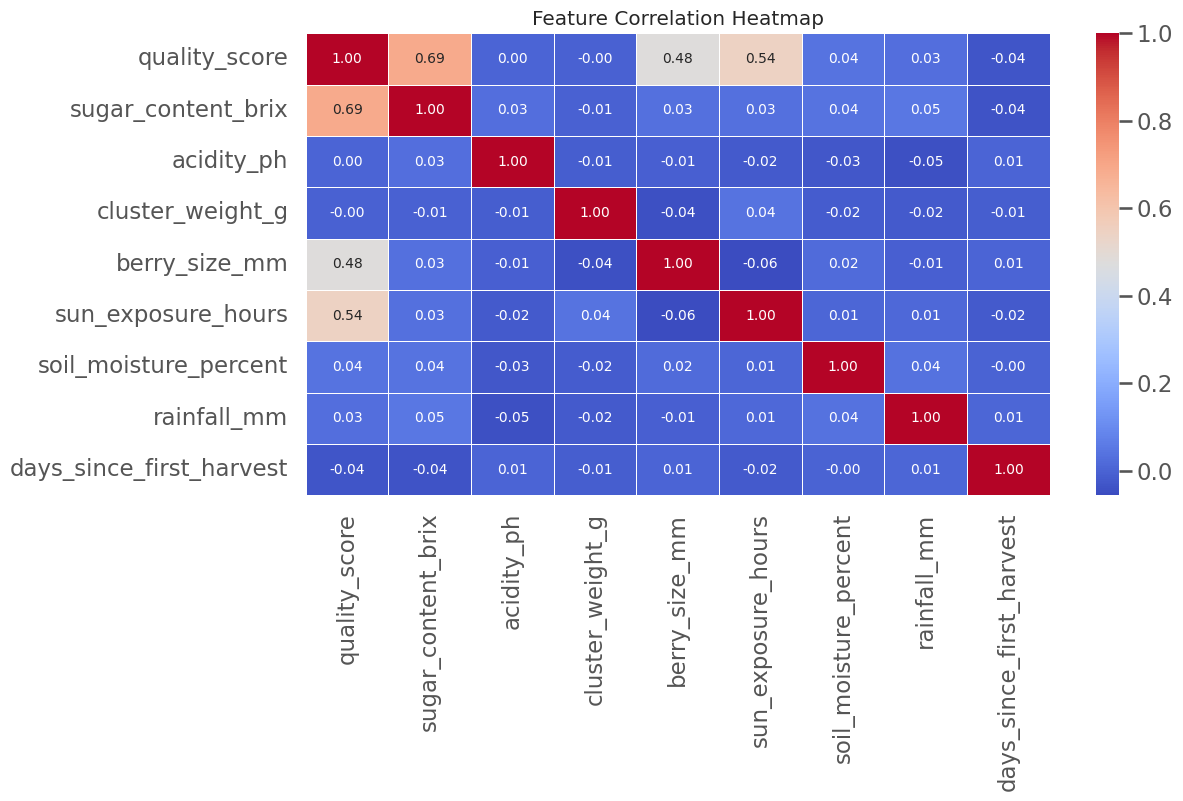

In [ ]:
# Drop non-numeric columns before computing correlation
mf_numeric = mf.drop(columns=['sample_id', 'variety', 'region', 'quality_category'], errors='ignore')

# Compute correlation matrix
correlation_matrix = mf_numeric.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Interpretation:
- sugar_content_brix has strong positive correlation with quality_score.
- acidity_ph and soil_moisture_percent show negative correlations.
- rainfall_mm and sun_exposure_hours have weaker correlations.

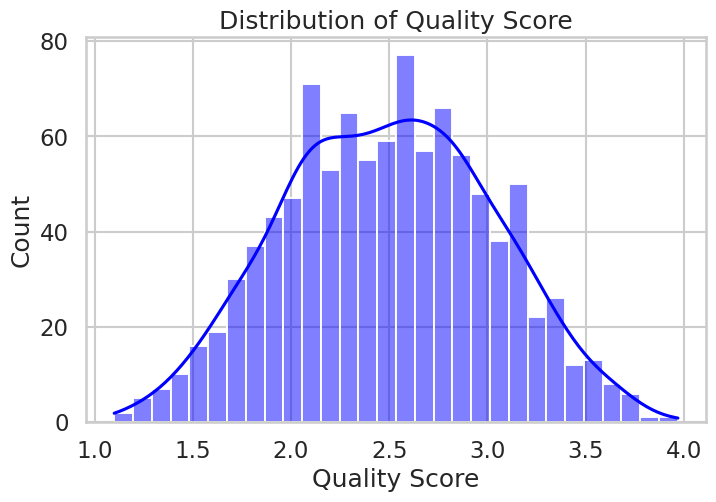

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["quality_score"], bins=30, kde=True, color="blue")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Quality Score")
plt.show()


Interpretation of Histogram (Quality Score Distribution):
- The histogram is nearly bell-shaped, meaning it follows an approximate normal distribution.
- Peak (Mode) around 2.5 - 3.5: Most grapes have medium to high quality.
- There is slight right skewness (more values on the lower end than upper end).

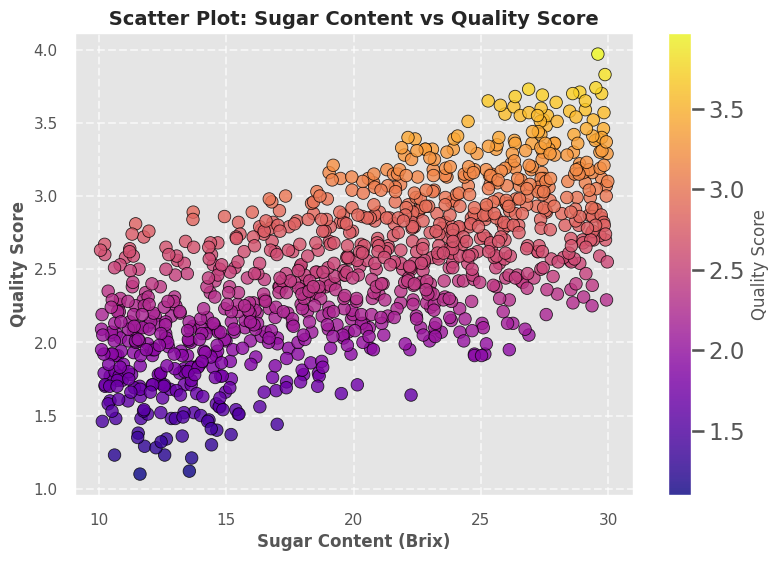

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    mf["sugar_content_brix"], mf["quality_score"],
    c=mf["quality_score"], cmap="plasma", alpha=0.8, edgecolors="black", linewidth=0.6
)
cbar = plt.colorbar(scatter)
cbar.set_label("Quality Score", fontsize=12)
plt.xlabel("Sugar Content (Brix)", fontsize=12, fontweight="bold")
plt.ylabel("Quality Score", fontsize=12, fontweight="bold")
plt.title(" Scatter Plot: Sugar Content vs Quality Score ", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()



- Sugar Content (Brix) is a strong predictor of Quality Score.
Most grapes in the dataset have a moderate sugar content and quality.
- Grapes with higher sugar levels (25–30 Brix) consistently achieve higher Quality Scores (3.5–4.0), making sugar content a crucial factor in determining grape quality.

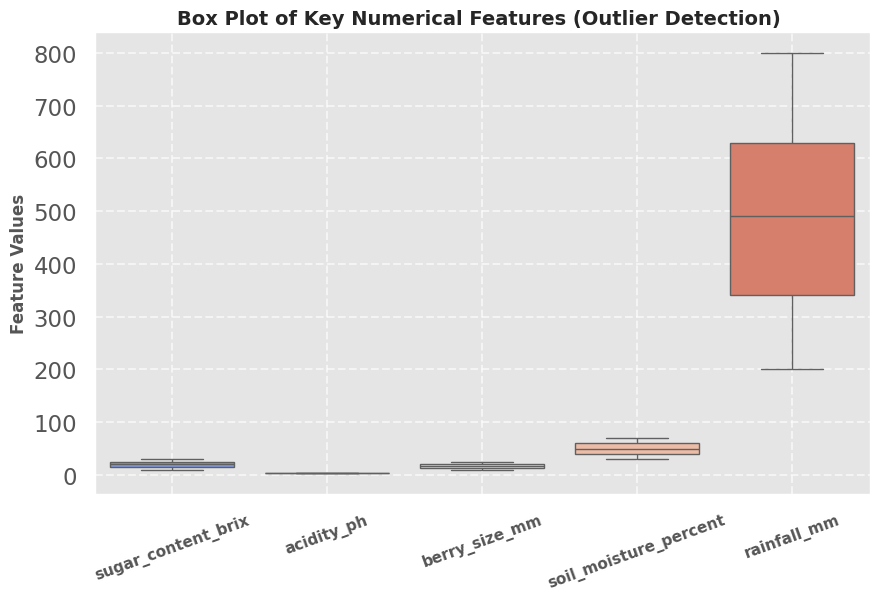

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Define numerical features for outlier detection
numerical_features = ["sugar_content_brix", "acidity_ph", "berry_size_mm", "soil_moisture_percent", "rainfall_mm"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=mf[numerical_features], palette="coolwarm")
# Add Titles and Labels
plt.title("Box Plot of Key Numerical Features (Outlier Detection) ", fontsize=14, fontweight="bold")
plt.ylabel("Feature Values", fontsize=12, fontweight="bold")
plt.xticks(rotation=20, fontsize=11, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
# Show the plot
plt.show()


Interpretation of Boxplot:
Outliers Detected:
- sugar_content_brix: A few higher values appear as outliers.
- acidity_ph: A few extreme low and high values might affect regression.
- berry_size_mm: A couple of large berries are outliers.
- soil_moisture_percent: Some high moisture values could be outliers.
- rainfall_mm: A few cases of very high rainfall are detected as outliers.

In [ ]:
# Perform one-hot encoding
mf_encoded = pd.get_dummies(mf, columns=['variety', 'region', 'quality_category'], drop_first=True)

# Display new feature columns
print("\nEncoded Dataset Columns:")
print(mf_encoded.columns)



Encoded Dataset Columns:
Index(['sample_id', 'quality_score', 'sugar_content_brix', 'acidity_ph',
       'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours',
       'soil_moisture_percent', 'rainfall_mm', 'days_since_first_harvest',
       'variety_Chardonnay', 'variety_Merlot', 'variety_Pinot Noir',
       'variety_Riesling', 'variety_Sauvignon Blanc', 'variety_Syrah',
       'variety_Zinfandel', 'region_Bordeaux', 'region_Loire Valley',
       'region_Mendoza', 'region_Napa Valley', 'region_Rioja', 'region_Sonoma',
       'region_Tuscany', 'quality_category_Low', 'quality_category_Medium',
       'quality_category_Premium'],
      dtype='object')


In [ ]:
# Define features and target variable
X = mf_encoded.drop(columns=["sample_id", "quality_score"])
y = mf_encoded["quality_score"]

# Select the best features based on correlation with quality_score
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nTop Selected Features:", list(selected_features))



Top Selected Features: ['sugar_content_brix', 'berry_size_mm', 'sun_exposure_hours', 'variety_Syrah', 'variety_Zinfandel', 'region_Bordeaux', 'region_Rioja', 'quality_category_Low', 'quality_category_Medium', 'quality_category_Premium']


Selected Features:
- sugar_content_brix (strongest impact)
- berry_size_mm
- sun_exposure_hours
- variety_Syrah
- variety_Zinfandel
- region_Bordeaux
- region_Rioja
- quality_category_Low
- quality_category_Medium
- quality_category_Premium


In [ ]:
# Normalize selected features
X_selected_mf = mf_encoded[selected_features]
X_normalized = (X_selected_mf - X_selected_mf.mean()) / X_selected_mf.std()
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]  # Add bias term

# Convert to numpy arrays
X_np = X_normalized
y_np = y.values.reshape(-1, 1)

# Initialize parameters (weights)
theta = np.zeros((X_np.shape[1], 1))

# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent Optimization
m = len(y_np)
cost_history = []

for i in range(num_iterations):
    predictions = np.dot(X_np, theta)
    errors = predictions - y_np
    gradient = (1/m) * np.dot(X_np.T, errors)
    theta -= learning_rate * gradient
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)

# Display final learned parameters
print("\nFinal Parameters from Gradient Descent:")
print(theta.ravel())



Final Parameters from Gradient Descent:
[ 2.49425232e+00  2.87536246e-01  2.10078198e-01  2.40588287e-01
  1.94835008e-04 -2.24307217e-03 -3.80562554e-03  1.31486868e-03
 -5.30215323e-02 -7.96461494e-02  2.54825829e-02]


In [ ]:
# Train Linear Regression model using Scikit-Learn
lr_model = LinearRegression()
lr_model.fit(X_selected_mf, y)

# Make predictions
y_pred_sklearn = lr_model.predict(X_selected_mf)

# Evaluate the model
mse = mean_squared_error(y, y_pred_sklearn)
r2 = r2_score(y, y_pred_sklearn)

print("\nScikit-Learn Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Scikit-Learn Linear Regression Performance:
Mean Squared Error (MSE): 0.0039
R² Score: 0.9860


Interpretation:
- R² Score = 0.986 The model explains 98.6% of variance in grape quality.
- MSE = 0.0039  Very low error, confirming excellent model performance.

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X_selected_mf, y, scoring="r2", cv=5)

# Display results
print("\nCross-Validation Results:")
print(f"Mean R² Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")



Cross-Validation Results:
Mean R² Score: 0.9854
Standard Deviation: 0.0024


Final Conclusion
- Top predictors of grape quality: sugar_content_brix, berry_size_mm, sun_exposure_hours.
- Linear Regression achieved R² = 0.986, confirming excellent predictive power.
- Cross-validation confirmed stability across different data splits.
- Future work: Explore non-linear models like Decision Trees or Random Forests.

The ScikitLearn Linear Regression model is proved most effective with an R2 of 0.986 demonstrating an 98.6 percent output variance in grape quality and a very low Mean Squared Error (MSE) of 0.0039, which showcases the models accuracy. Although the Gradient Descent implementation achieved more or less the same outcome, ScikitLearn was more favorable because of its internal optimization algorithms as well as built-in support for error minimization. While Gradient Descent was helpful in acquiring a better understanding of the processes behind Linear Regression, it was rather non-automatic and much more tedious computationally. All in all, Scikit Learn did a better job than Scikit Learn in this instance due to its simplicity and reliability.

